# Import Dependencies

In [1]:
# For plotting
import matplotlib.pyplot as plt

#Handling arrays
import numpy as np

#Handling Dataframes
import pandas as pd

#Splitting the data
from sklearn.model_selection import train_test_split

#Machine Learning Models 
from sklearn.tree import DecisionTreeRegressor

#Perofromance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



## Loading and viewing data

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep = ';')

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Preprocessing

### Search for non-float entries and delete

In [4]:
df = df.replace('?',None)
df.dropna

<bound method DataFrame.dropna of                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                     0   
2075255  26/11/2010  20:59:00               0.944                     0   
2075256  26/11/2010  21:00:00               0.938                     0   
2075257  26/11/2010  21:01:00               0.934                     0   
2075258  26/11/2010  21:02:00               0.932                     0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  

### Analysing different columns

count    2.075259e+06
mean     1.110995e+00
std      6.115908e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.800000e+01
Name: Sub_metering_1, dtype: float64

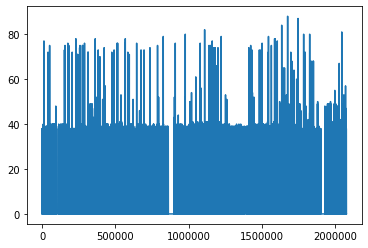

In [5]:
df['Sub_metering_1'] = pd.Series(np.array([float(j) for j in df['Sub_metering_1'].values]))
plt.plot(df['Sub_metering_1'].values)
df['Sub_metering_1'].describe()

count    2.075259e+06
mean     1.287958e+00
std      5.786865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      8.000000e+01
Name: Sub_metering_2, dtype: float64

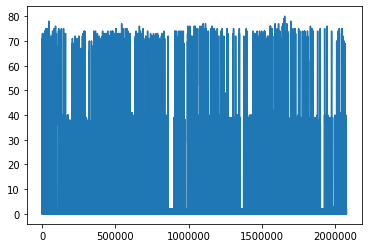

In [6]:
df['Sub_metering_2'] = pd.Series(np.array([float(j) for j in df['Sub_metering_2'].values]))
plt.plot(df['Sub_metering_2'].values)
df['Sub_metering_2'].describe()

count    2.049280e+06
mean     6.458447e+00
std      8.437154e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.700000e+01
max      3.100000e+01
Name: Sub_metering_3, dtype: float64

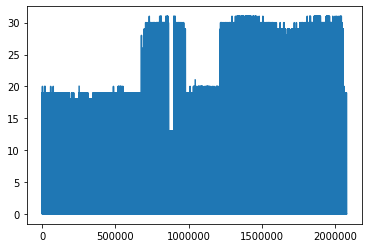

In [7]:
df['Sub_metering_3'] = pd.Series(np.array([float(j) for j in df['Sub_metering_3'].values]))
plt.plot(df['Sub_metering_3'].values)
df['Sub_metering_3'].describe()

count    2.075259e+06
mean     2.408416e+02
std      3.235574e+00
min      2.232000e+02
25%      2.390000e+02
50%      2.410200e+02
75%      2.428700e+02
max      2.541500e+02
Name: Voltage, dtype: float64

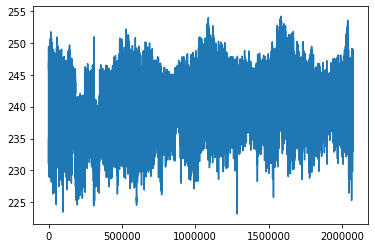

In [8]:
df['Voltage'] = pd.Series(np.array([float(j) for j in df['Voltage'].values]))
plt.plot(df['Voltage'].values)
df['Voltage'].describe()

count    2.075259e+06
mean     1.233280e-01
std      1.125144e-01
min      0.000000e+00
25%      4.800000e-02
50%      1.000000e-01
75%      1.940000e-01
max      1.390000e+00
Name: Global_reactive_power, dtype: float64

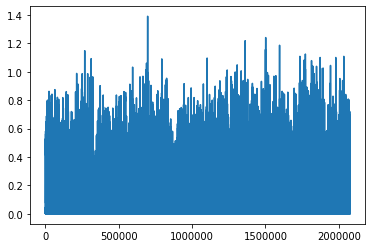

In [9]:
df['Global_reactive_power'] = pd.Series(np.array([float(j) for j in df['Global_reactive_power'].values]))
plt.plot(df['Global_reactive_power'].values)
df['Global_reactive_power'].describe()

count    2.075259e+06
mean     1.086168e+00
std      1.053172e+00
min      7.600000e-02
25%      3.080000e-01
50%      5.980000e-01
75%      1.524000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64

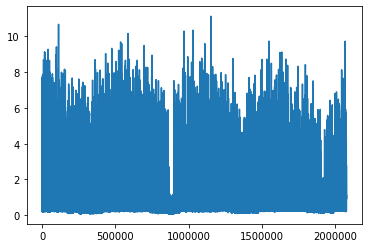

In [10]:
df['Global_active_power'] = pd.Series(np.array([float(j) for j in df['Global_active_power'].values]))
plt.plot(df['Global_active_power'].values)
df['Global_active_power'].describe()

#### Considering the repeating pattern of peaks, find an optimal wavelet which could give maximum correlation with the entire signal

#### Global Reactive Power is being emphasised now on considering the other parameters to have insignificant average about mean

### Finding tentative segment width

#### Number of entries above certain tresholds

Text(0.5, 0, 'Power in KW')

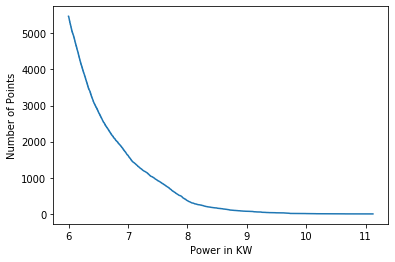

In [11]:
plt.plot(0.001*np.arange(6000,np.max(df['Global_active_power'])*1000),np.array([len(df[df['Global_active_power']>x].index) for x in 0.001*np.arange(6000,np.max(df['Global_active_power'])*1000)]))
plt.ylabel('Number of Points')
plt.xlabel('Power in KW')

#### The curve inflects at 8 and begins to asymptote at 9.5

In [12]:
df[df['Global_active_power']>9.5].index

Int64Index([ 112448,  112449,  112450,  112451,  535805,  542860,  584768,
             584769,  584790,  586200,  586201,  968160,  968161,  968163,
            1029773, 1029774, 1029775, 1110009, 1150544, 1150545, 1150546,
            1546690, 1546691, 1546692, 1546693, 1546694, 1546695, 2066458,
            2066459, 2066460, 2066461, 2066462],
           dtype='int64')

Text(0, 0.5, 'Power in KW')

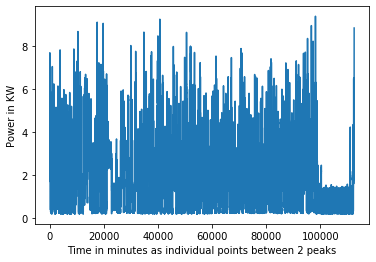

In [13]:
plt.plot(df['Global_active_power'].values[:112448])
plt.xlabel('Time in minutes as individual points between 2 peaks')
plt.ylabel('Power in KW')

#### To identify another peak near 500000

In [14]:
W = np.argmax(df['Global_active_power'][[535805,  542860,  584768,584769,  584790,  586200,  586201]])
W

5

In [15]:
MaxRange = int(df.shape[0]/W)*W
MaxRange

2075255

In [16]:
Ref = np.array(list(df['Global_active_power'][:W].values)*2)

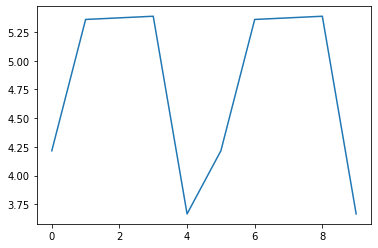

In [17]:
plt.plot(Ref)

In [18]:
Diff = abs(Ref-df['Global_active_power'][W:MaxRange].values)

ValueError: operands could not be broadcast together with shapes (10,) (2075250,) 

In [19]:
plt.plot(Diff)

NameError: name 'Diff' is not defined

## Allocate Seasons and Months Columns to the Data

In [20]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June','July','Aug','Sept', 'Oct', 'Nov', 'Dec']
Seasons = ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter']
Month = []
Season = []

In [21]:
for date in df['Date']:
    if(date[1]=='/'):
        date = date[2:4]
    else:
        date = date[3:5]
    #print(date)
    
    if(date[1]=='/'):
        date = date[0]
    
    #print(date)
    
    Month.append(Months[int(date)-1])
    Season.append(Seasons[int(date)-1])

In [22]:
df['Month'] = pd.Series(Month)
df['Season'] = pd.Series(Season)

#### Remove Day 1 entries considering inconsistent timing

In [23]:
df = df[df['Date']!='16/12/2006']
df['Index'] = np.arange(len(df['Date']))
df = df.set_index('Index')
df.head()

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Season
Index,,,,,,,,,,,
0,17/12/2006,00:00:00,1.044,0.152,242.73,4.400,0.0,2.0,0.0,Dec,Winter
1,17/12/2006,00:01:00,1.520,0.220,242.20,7.400,0.0,1.0,0.0,Dec,Winter
2,17/12/2006,00:02:00,3.038,0.194,240.14,12.600,0.0,2.0,0.0,Dec,Winter
3,17/12/2006,00:03:00,2.974,0.194,239.97,12.400,0.0,1.0,0.0,Dec,Winter
4,17/12/2006,00:04:00,2.846,0.198,240.39,11.800,0.0,2.0,0.0,Dec,Winter


### Analyse Data of different seasons

count    496800.000000
mean          1.417840
std           1.207055
min           0.194000
25%           0.370000
50%           1.348000
75%           1.946000
max          11.122000
Name: Global_active_power, dtype: float64

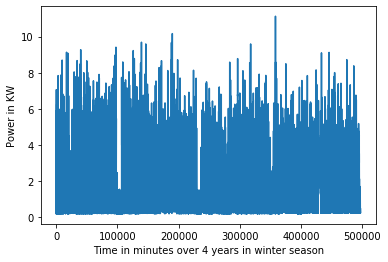

In [24]:
plt.plot(df[df['Season']=='Winter']['Global_active_power'].values)
plt.ylabel('Power in KW')
plt.xlabel('Time in minutes over 4 years in winter season')
df[df['Season']=='Winter']['Global_active_power'].describe()


count    529920.000000
mean          0.725923
std           0.790222
min           0.076000
25%           0.230000
50%           0.340000
75%           1.160000
max           8.760000
Name: Global_active_power, dtype: float64

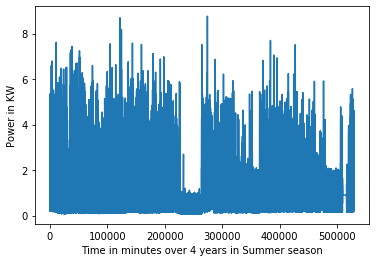

In [25]:
plt.plot(df[df['Season']=='Summer']['Global_active_power'].values)
plt.ylabel('Power in KW')
plt.xlabel('Time in minutes over 4 years in Summer season')
df[df['Season']=='Summer']['Global_active_power'].describe()

count    518223.00000
mean          1.12472
std           1.05842
min           0.09800
25%           0.31800
50%           0.69200
75%           1.57400
max          10.34800
Name: Global_active_power, dtype: float64

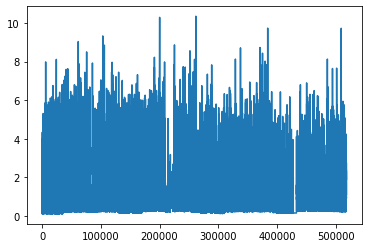

In [26]:
plt.plot(df[df['Season']=='Fall']['Global_active_power'].values)
df[df['Season']=='Fall']['Global_active_power'].describe()

count    529920.000000
mean          1.096301
std           1.009791
min           0.104000
25%           0.340000
50%           0.626000
75%           1.522000
max          10.670000
Name: Global_active_power, dtype: float64

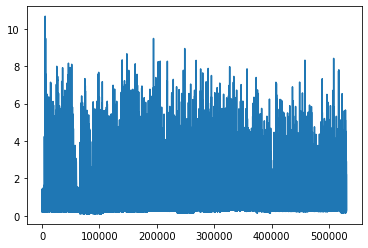

In [27]:
plt.plot(df[df['Season']=='Spring']['Global_active_power'].values)
df[df['Season']=='Spring']['Global_active_power'].describe()

### Considering the pattern in Winter, find optimal wavelet

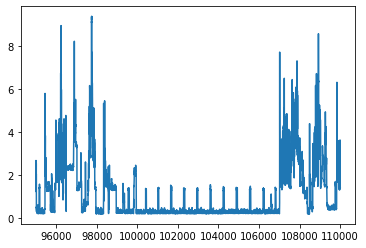

In [28]:
plt.plot(np.arange(95000,110000),df[df['Season']=='Winter']['Global_active_power'][95000:110000].values)

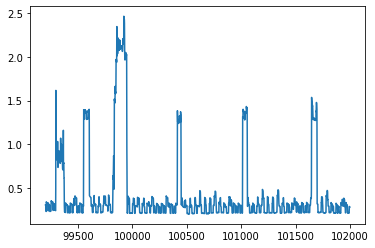

In [29]:
plt.plot(np.arange(99200,102000),df[df['Season']=='Winter']['Global_active_power'][99200:102000].values)

In [30]:
WinRefRange = (107000,237200)

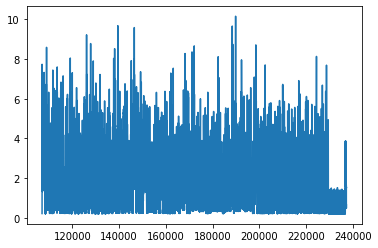

In [31]:
plt.plot(np.arange(107000,237200),df[df['Season']=='Winter']['Global_active_power'][107000:237200].values)
WinW = df[df['Season']=='Winter']['Global_active_power'][107000:237200].values

In [32]:
wRef = np.array(list(WinW)*3)

In [33]:
wRef

array([0.214, 0.214, 0.216, ..., 0.632, 0.67 , 0.65 ])

1.300032555043523

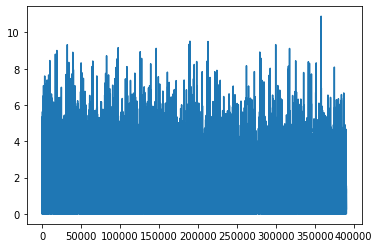

In [34]:
plt.plot(abs(wRef - df[df['Season']=='Winter']['Global_active_power'][:len(wRef)].values))
np.mean(abs(wRef - df[df['Season']=='Winter']['Global_active_power'][:len(wRef)].values))

### Experiment by correlating per day usage with other days of the same season

#### Day 1

Text(0.5, 0, 'Time in seconds for a day in Winter Season')

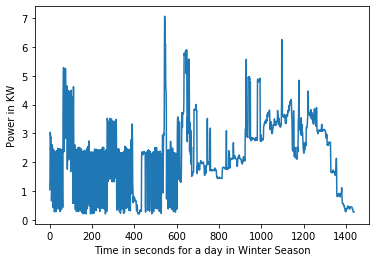

In [35]:
plt.plot(df[df['Season']=='Winter']['Global_active_power'][0:1440].values)
plt.ylabel('Power in KW')
plt.xlabel('Time in seconds for a day in Winter Season')


#### Day 2

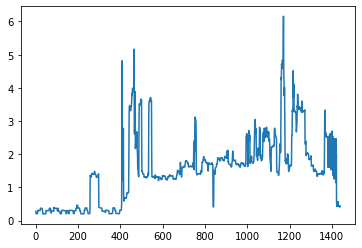

In [36]:
plt.plot(df[df['Season']=='Winter']['Global_active_power'][1440:2*1440].values)

#### Day 3

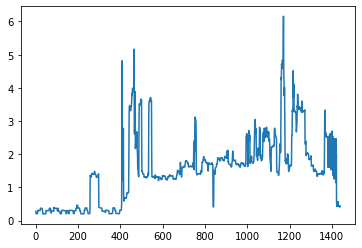

In [37]:
plt.plot(df[df['Season']=='Winter']['Global_active_power'][1440:2*1440].values)

#### Number of Days in Winter

In [38]:
WnDays = 496800/1440

#### Plot the mean difference of power usage patterns of a particular day against all days in Winter

In [39]:
Comm = np.array([np.mean(abs(df[df['Season']=='Winter']['Global_active_power'][i*1440:(i+1)*1440].values - df[df['Season']=='Winter']['Global_active_power'][0:1440].values)) for i in range(344)])

Text(0.5, 0, 'Number of days in Winter Season')

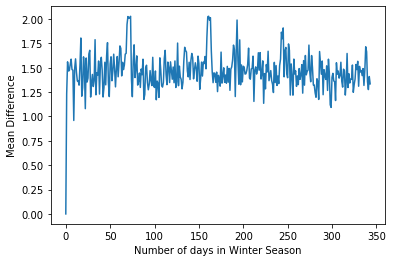

In [40]:
plt.plot(Comm)
plt.ylabel('Mean Difference')
plt.xlabel('Number of days in Winter Season')



In [41]:
np.mean(Comm)

1.4634804586563308

### Pick the 5 most different usage patterns in the winter season

In [51]:
np.sort(Comm)[:5]

array([0.        , 0.95909861, 1.08011944, 1.09290278, 1.12001111])

In [52]:
D = []

In [55]:
for i in np.sort(Comm)[:5]:
    for j in range(len(Comm)):
        if(i==Comm[j]):
            D.append(j)

In [56]:
D

[163, 160, 70, 73, 161, 0, 9, 22, 299, 298]

In [57]:
U = [np.array([np.mean(abs(df[df['Season']=='Winter']['Global_active_power'][i*1440:(i+1)*1440].values - df[df['Season']=='Winter']['Global_active_power'][j*1440:(j+1)*1440].values)) for j in range(344)]) for i in D]

In [47]:
U

[array([2.01397222, 1.19019028, 0.83623472, 1.21519722, 0.86820556,
        1.28757917, 2.96276806, 1.50065833, 1.56995833, 2.38174861,
        0.72398056, 1.1085875 , 1.85464722, 1.62129861, 2.08181944,
        1.62261389, 0.60697222, 0.52590417, 1.91235556, 1.53993611,
        0.7942875 , 1.43980833, 1.21648056, 0.96965694, 1.15665833,
        1.23829861, 0.69339722, 1.89336806, 1.76537639, 1.15452083,
        0.91535833, 1.63855556, 0.94295694, 0.71158056, 1.82883056,
        2.0223875 , 1.17289861, 0.90173333, 1.72555694, 0.80358611,
        0.83713056, 1.09233333, 1.8012375 , 1.035175  , 0.86861528,
        1.31214444, 0.93922222, 0.83775556, 2.46851806, 2.15355833,
        0.81076667, 0.64214167, 1.27800417, 0.91614861, 0.79792917,
        1.62072778, 2.13788889, 0.96039306, 0.72055139, 1.42506944,
        1.04105694, 0.92284722, 1.10110556, 2.30972639, 1.18405972,
        1.83765   , 1.10623472, 1.99392083, 0.66284722, 0.27158472,
        0.20943056, 0.26237778, 0.15516667, 0.22

In [49]:
print((df[df['Season']=='Winter']['Global_active_power'])[163])

0.656
